In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("cyberbullying_tweets.csv")

In [3]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
df.shape

(47692, 2)

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


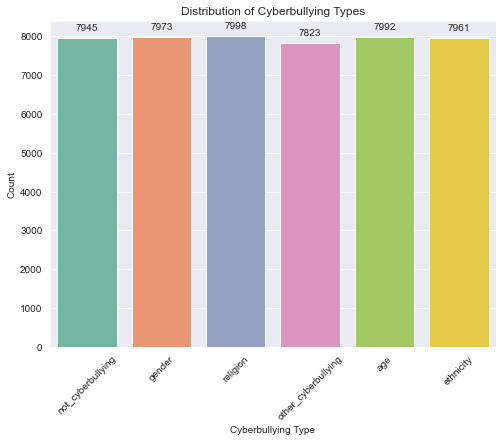

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
ax = sns.countplot(df["cyberbullying_type"], palette="Set2")
ax.set_title("Distribution of Cyberbullying Types")
ax.set_xlabel("Cyberbullying Type")
ax.set_ylabel("Count")
plt.xticks(rotation=45)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Define pre-processing function
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r"@[^\s]+|#[^\s]+", "", tweet)
    
    # Remove non-alphabetic characters
    tweet = re.sub(r"[^a-zA-Z]", " ", tweet)
    
    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the lemmatized tokens back into a string
    clean_tweet = " ".join(lemmatized_tokens)
    
    return clean_tweet

# Apply pre-processing to the "tweet_text" column and create a new column "clean_text"
df["clean_text"] = df["tweet_text"].apply(preprocess_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/devansh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df.sample(15)

,tweet_text,cyberbullying_type,clean_text
26660,@petfish burn that mother down,other_cyberbullying,burn mother
44281,Answer the Q. Is that u walking back your raci...,ethnicity,answer q u walking back racism blm say white p...
29746,Remember everybody used to wear them ugly ass ...,other_cyberbullying,remember everybody used wear ugly as roshes
16854,Guys IM SCREAMING. I almost died. I was eating...,religion,guy im screaming almost died eating popcorn li...
2482,I'm chillin till I go back to school... Too mu...,not_cyberbullying,chillin till go back school much goin
34559,my fave thing about getting older is seeing al...,age,fave thing getting older seeing guy middle hig...
4416,"@dylanw last i checked, baldwin was verified.",not_cyberbullying,last checked baldwin verified
32018,Periodt i’m really skinny bc of genes and my m...,age,periodt really skinny bc gene mom got bullied ...
20290,Translation - my chances for re-election are d...,religion,translation chance election dimming need appea...
28003,@thebackpack08 @BenKuchera 1k :/,other_cyberbullying,k


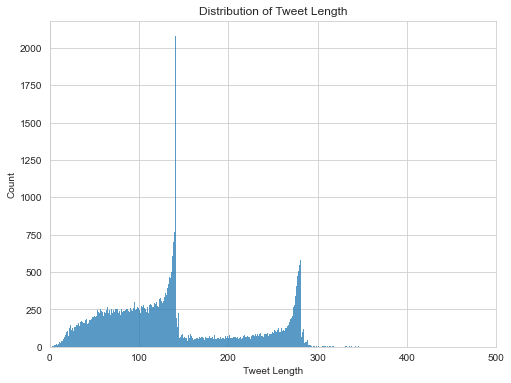

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with the length of each tweet
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x))

# Set the style of the plot
sns.set_style('whitegrid')

# Create the histogram using seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tweet_length', binwidth=1, kde=False)

# Add labels and title to the plot
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.xlim(0, 500)

# Display the plot
plt.show()


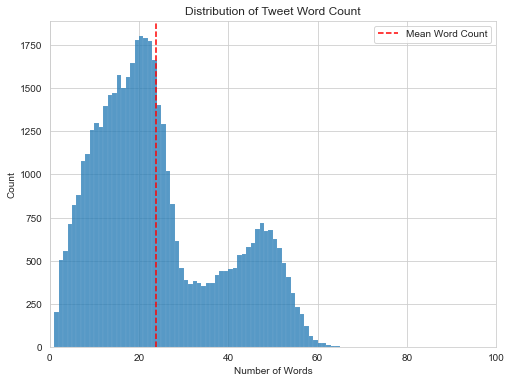

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column with the word count of each tweet
df['tweet_word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

# Calculate the mean word count
mean_word_count = df['tweet_word_count'].mean()

# Set the style of the plot
sns.set_style('whitegrid')

# Create the histogram using seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tweet_word_count', binwidth=1, kde=False)

# Add a vertical line for the mean value
plt.axvline(mean_word_count, color='r', linestyle='--', label='Mean Word Count')

# Add labels and title to the plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.legend()
plt.xlim(0, 100)

# Display the plot
plt.show()


In [10]:
df

,tweet_text,cyberbullying_type,clean_text,tweet_length,tweet_word_count
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious,61,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white,115,14
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,60,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks head concerned another angry dude...,103,18
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,103,18
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...,234,42
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,276,45
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,104,20
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt youre nigger fucking unfollow fuck...,90,15


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["cyberbullying_type"]=encoder.fit_transform(df["cyberbullying_type"])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
X = df["clean_text"]
y= df["cyberbullying_type"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=35)
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform training data
X_train = vectorizer.fit_transform(X_train)

# Transform testing data
X_test = vectorizer.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8103574798196876


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the pre-trained GloVe model
glove_model = api.load("glove-twitter-25")


# Create a CountVectorizer object with n-grams and fit it on the dataset
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(df['clean_text'])

# Convert the tweets to a matrix of word embeddings
tweet_vectors = []
for tweet in df['clean_text']:
    tweet_matrix = []
    for word in tweet.split():
        try:
            tweet_matrix.append(glove_model[word])
        except KeyError:
            continue
    tweet_vectors.append(np.mean(tweet_matrix, axis=0))
tweet_vectors = np.array(tweet_vectors)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate hash vectorizer
hash_vectorizer = HashingVectorizer(n_features=10000)

# Fit and transform training data
X_train = hash_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = hash_vectorizer.transform(X_test)

# Generate LSA model
lsa = TruncatedSVD(n_components=300)
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_lsa, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test_lsa)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate hash vectorizer
hash_vectorizer = HashingVectorizer(n_features=10000)

# Fit and transform training data
X_train = hash_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = hash_vectorizer.transform(X_test)

# Generate LSA model
lsa = TruncatedSVD(n_components=300)
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

# Train support vector machine classifier
clf = LinearSVC()
clf.fit(X_train_lsa, y_train)

# Predict labels for testing data
y_pred = clf.predict(X_test_lsa)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform training data
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data
X_test = tfidf_vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test Random Forest model
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Test XGBoost model
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

# Train CatBoost model
cat_model = CatBoostClassifier(n_estimators=100, random_state=42)
cat_model.fit(X_train, y_train)

# Test CatBoost model
cat_pred = cat_model.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
print("CatBoost Accuracy:", cat_acc)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['clean_text']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using HashingVectorizer
vectorizer = HashingVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Apply LSA
lsa = TruncatedSVD(n_components=100, algorithm='arpack')
X_train_lsa = lsa.fit_transform(X_train_vectorized)
X_test_lsa = lsa.transform(X_test_vectorized)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_lsa, y_train)
rf_pred = rf.predict(X_test_lsa)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: ", rf_accuracy)

# Train XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_lsa, y_train)
xgb_pred = xgb.predict(X_test_lsa)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: ", xgb_accuracy)

# Train CatBoost classifier
cat = CatBoostClassifier(random_state=42, verbose=False)
cat.fit(X_train_lsa, y_train)
cat_pred = cat.predict(X_test_lsa)
cat_accuracy = accuracy_score(y_test, cat_pred)
print("CatBoost Accuracy: ", cat_accuracy)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bag-of-Words model
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bow, y_train)
y_pred_rf = rf.predict(X_test_bow)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Create a Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bow, y_train)
y_pred_lr = lr.predict(X_test_bow)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Random Forest accuracy:", acc_rf)
print("Logistic Regression accuracy:", acc_lr)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define n-gram range
ngram_range = (1, 2)

# Define CountVectorizer with n-grams and BoW
count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')

# Define TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Define random forest classifier
rf = RandomForestClassifier()

# Define logistic regression classifier
lr = LogisticRegression()

# Define pipeline with CountVectorizer, TfidfTransformer, and random forest classifier
rf_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('rf', rf)])

# Define pipeline with CountVectorizer, TfidfTransformer, and logistic regression classifier
lr_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('lr', lr)])

# Train and evaluate random forest model
rf_pipeline.fit(X_train, y_train)
rf_acc = rf_pipeline.score(X_test, y_test)
print("Random Forest accuracy:", rf_acc)

# Train and evaluate logistic regression model
lr_pipeline.fit(X_train, y_train)
lr_acc = lr_pipeline.score(X_test, y_test)
print("Logistic Regression accuracy:", lr_acc)

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load pre-trained word embeddings
model = api.load('word2vec-google-news-300')

# Load the dataset
# Assuming the dataset is stored in a list called "data" where each element is a text sample
# and the corresponding labels are stored in a list called "labels"
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define a function to extract word embeddings for a given text
def get_embedding(text):
    words = text.split()
    embeddings = []
    for word in words:
        try:
            embeddings.append(model[word])
        except KeyError:
            # If the word is not in the vocabulary, ignore it
            pass
    # Take the mean of all word embeddings to get a single vector for the text
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(300) # If no embeddings are found, return a zero vector of the same dimensionality

# Extract features for the training and test sets
X_train_embeddings = [get_embedding(text) for text in X_train]
X_test_embeddings = [get_embedding(text) for text in X_test]

# Train logistic regression and random forest models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
lr_model.fit(X_train_embeddings, y_train)
rf_model.fit(X_train_embeddings, y_train)

# Predict labels for the test set
lr_predictions = lr_model.predict(X_test_embeddings)
rf_predictions = rf_model.predict(X_test_embeddings)

# Print the accuracy scores for both models
print("Logistic regression accuracy: {:.2f}".format(accuracy_score(y_test, lr_predictions)))
print("Random forest accuracy: {:.2f}".format(accuracy_score(y_test, rf_predictions)))



In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the pre-trained GloVe model
glove_model = api.load("glove-twitter-25")

# Load the dataset
df = pd.read_csv("data.csv")

# Create a CountVectorizer object with n-grams and fit it on the dataset
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(df['clean_text'])

# Convert the tweets to a matrix of word embeddings
tweet_vectors = []
for tweet in df['clean_text']:
    tweet_matrix = []
    for word in tweet.split():
        try:
            tweet_matrix.append(glove_model[word])
        except KeyError:
            continue
    tweet_vectors.append(np.mean(tweet_matrix, axis=0))
tweet_vectors = np.array(tweet_vectors)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweet_vectors, df['label'], test_size=0.2, random_state=42)

# Fit a logistic regression model on the training data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
